# Author : Vamshikrishna Dande

## Task 1 : Prediction using Supervised Machine Learning

## GRIP @ The Sparks Foundation
#### predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [218]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

## 1. Reading the data from Source

In [219]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [220]:
#print the frist five records...
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [221]:
#print the last five records...
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [222]:
#describe() is used to view some basic statistical details like percentile, mean, std etc.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [223]:
#info() function is used to print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 2. Data Visualization

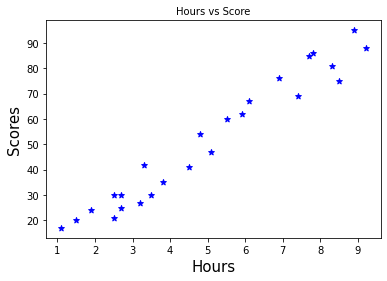

From the graph a positive linear relation between the number of hours studied and percentage of score.


In [224]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='blue',marker='*')
plt.show()
print("From the graph a positive linear relation between the number of hours studied and percentage of score.")

## 3. Data Preprocessing  

In [225]:
# Attributes are inputs and Labels are outputs
a=data.iloc[:,:-1].values
b=data.iloc[:,-1].values

In [226]:
print("Hours",a,end=' ')

Hours [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 

In [227]:
print("Scores",b,end=' ')

Scores [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86] 

## 4. Model Training
## Splitting Data into Train and Test data sets

In [228]:
a_Train,a_Test,b_Train,b_Test= train_test_split(a,b,random_state = 0,test_size=0.2)

In [229]:
print("a Train.Shape =", a_Train.shape)
print("b Train.Shape =", b_Train.shape)
print("a Test.Shape  =", a_Test.shape)
print("b Test.Shape  =", b_Test.shape)

a Train.Shape = (20, 1)
b Train.Shape = (20,)
a Test.Shape  = (5, 1)
b Test.Shape  = (5,)


## 5. Training The model

In [230]:
LinReg.fit(a_Train,b_Train)
print("$$---Training is finished---$$")

$$---Training is finished---$$


In [231]:
#I is Intercept and S is Slope
print("I =",LinReg.intercept_,"S =",LinReg.coef_)

I = 2.018160041434683 S = [9.91065648]


##  6. Plotting the Line of regression

In [232]:
b0=LinReg.intercept_+LinReg.coef_*a_Train

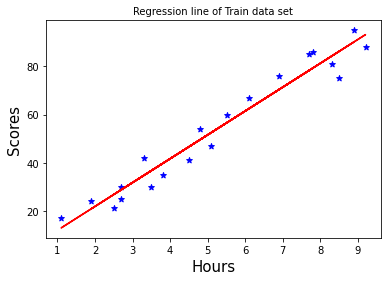

In [233]:
plt.scatter(a_Train,b_Train,color='Blue',marker='*')
plt.plot(a_Train,b0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line of Train data set",fontsize=10)
plt.show()

## 7. Test Data Model

In [234]:
b_pred=LinReg.predict(a_Test)##predicting the Scores for test data
print(b_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [235]:
b_Test

array([20, 27, 69, 30, 62], dtype=int64)

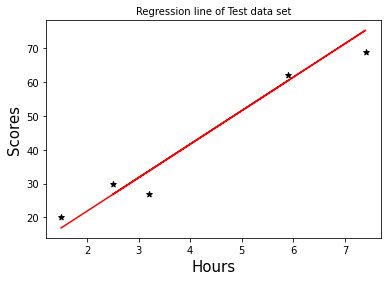

In [236]:
#plotting line on test data
plt.plot(a_Test,b_pred,color='red')
plt.scatter(a_Test,b_Test,color='black',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line of Test data set",fontsize=10)
plt.show()

## 8.Comparing Acutal vs Predicted 

In [237]:
b_Test1 = list(b_Test)
prediction=list(b_pred)
df_compare = pd.DataFrame({ 'Actual':b_Test1,'Result':prediction})
print(df_compare)

   Actual     Result
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


## 9. Accuracy of the Model

In [238]:
a=metrics.r2_score(b_Test,b_pred)
print("fit test score  = ",a)

fit test score  =  0.9454906892105356


## 10. Predicting the Error

In [239]:
MSE = metrics.mean_squared_error(a_Test,b_pred)
Root = np.sqrt(metrics.mean_squared_error(b_Test,b_pred))
Abs = np.sqrt(metrics.mean_squared_error(b_Test,b_pred))
print("$$--Mean Squared Error--$$     =",MSE)
print("$$--Root Mean Squared Error--$$=",Root)
print("$$--Mean Absolute Error--$$    = ",Abs)

$$--Mean Squared Error--$$     = 1871.4930870593864
$$--Root Mean Squared Error--$$= 4.6474476121003665
$$--Mean Absolute Error--$$    =  4.6474476121003665


In [240]:
Prediction_score = LinReg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours/day:",Prediction_score)

predicted score for a student studying 9.25 hours/day: [93.69173249]


## Conclusion
#### I was successfully able to carry-out Prediction using Supervised ML task

# Thank You